# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**1. Business Objective**

The goal is to build a predictive model to estimate the price of used cars based on various attributes (year, mileage, condition, etc)
The ability to accurately predict car prices will support business decisions for car dealerships, private sellers and other online marketplaces. This will help them improve profit margin and help in inventory management. This will ultimately lead to higher customer satisfaction.

**2. Problem Statement**

In the used car market, prices are influenced by multiple factors. Determining fair market value for each car manually is time-consuming, subjective and often inconsistent. A data driven approach with the right data modeling is needed to accurately predict the used car price.

**3. Success Criteria**

* __Model Performance__
Objective is to achieve high accuracy and low error rates. We need to split the data into a training and test sets. We will run various models on the training data. Minimizing the Mean Absolute Error on the test data is the aim of the modeling exercise

* __Scalability__
Our Modeling solution needs to be leverage only the most important criteria for prediction. The solution needs to be scalable to handle large datasets

* __Impact__
Demonstrate that the model's price recommendations improve sales and margins compared to historical data.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Load the dataset
vehicle_df = pd.read_csv("data/vehicles.csv")

In [79]:
# check the data
vehicle_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [80]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [81]:
#check for null values
print(vehicle_df.isnull().sum().sort_values())

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64


In [82]:
vehicle_df.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

**Observations**
* The dataset has a lot of null values
* Price is the dependent variable
* Out of all the independent variable, only year, odometer and id are numerica. Rest of the data is a string
* Price has a large variation in the dataset ranging from 0.0 to 3.73e+09
* ID and VIN are not relevant in the model calculations and can be dropped from the dataset.

---

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [83]:
# drop duplicates
vehicle_df.drop_duplicates()
print('Size of the dataset ', vehicle_df.shape)

Size of the dataset  (426880, 18)


In [84]:
# Dropping ID and VIN since they are not relevant to the model predictions
# additionally dropping region and state
# Dropping manufacturer and model. Our first focus is on generic analysis irrespective of car model
data = vehicle_df.drop(['id', 'VIN', 'region', 'state', 'manufacturer', 'model'], axis=1)

In [85]:
# Use one hot encoding to convert non-numerical data into numerical columns
data_encoded = pd.get_dummies(data)
print('Shape of encoded data ', data_encoded.shape)

Shape of encoded data  (426880, 63)


In [86]:
# Currently we have a lot of columns. This is not scalable. Trimming the columns on the orignal dataset
# Calculate the correlation matrix with price
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']
corr_matrix = X.corrwith(y)

# Get the absolute values of the correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Get the maximum correlation value for each column (excluding self-correlation)
max_corr_values = abs_corr_matrix.sort_values(ascending=False)
max_corr_values = max_corr_values[max_corr_values < 1]  # Remove self-correlation

# Get the top 10 maximum correlation pairs
n = 10
top_n_corr_pairs = max_corr_values.head(n)

print(top_n_corr_pairs)

odometer                 0.010032
condition_fair           0.007147
year                     0.004925
paint_color_green        0.004854
drive_fwd                0.002817
transmission_manual      0.002529
cylinders_4 cylinders    0.002502
type_sedan               0.002462
cylinders_8 cylinders    0.002382
condition_good           0.002208
dtype: float64


In [87]:
# Using RFE to identify top 10 columns
# RFE for feature selection
data_encoded = data_encoded.dropna()
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 5 features
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['condition_fair', 'title_status_missing', 'title_status_parts only',
       'type_bus', 'type_convertible', 'type_hatchback', 'type_mini-van',
       'type_offroad', 'type_wagon', 'paint_color_green'],
      dtype='object')


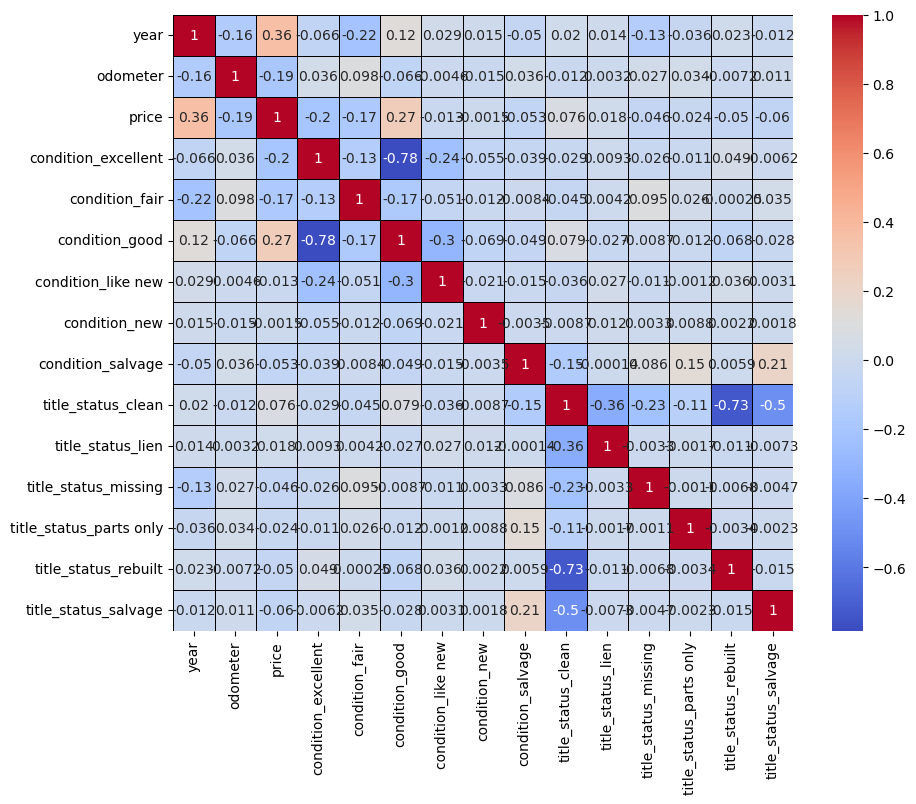

In [88]:
# based on the above analysis, the following columns are kept for analysis
# year, odometer, condition, title_status
data = vehicle_df[['year', 'odometer', 'condition', 'title_status', 'price']]

# drop null values
data = data.dropna()

# remove outliers of price using the IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
data = data.loc[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# One-Hot encoding to convert non-numeric columns
data_encoded = pd.get_dummies(data)
data_encoded = data_encoded.fillna(0)
data_encoded = data_encoded.astype(int)

# Plot the correlation matrix
corr = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

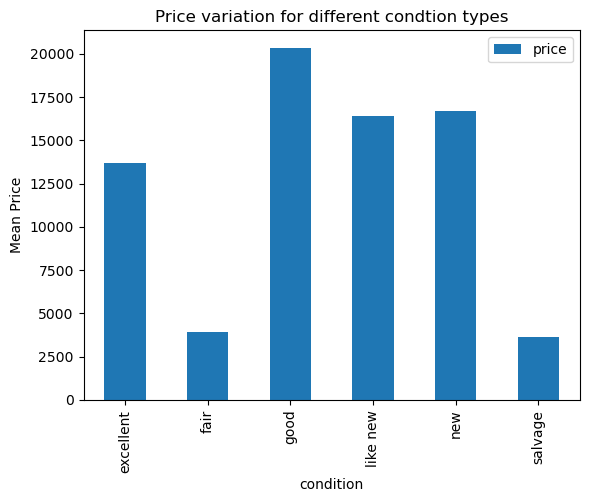

In [89]:
# Visualizing the price variation by condition variable
df = data.groupby(['condition'])['price'].mean().reset_index()
df.plot.bar(x = 'condition', y = 'price')
plt.ylabel('Mean Price')
plt.title("Price variation for different condtion types")
plt.show()

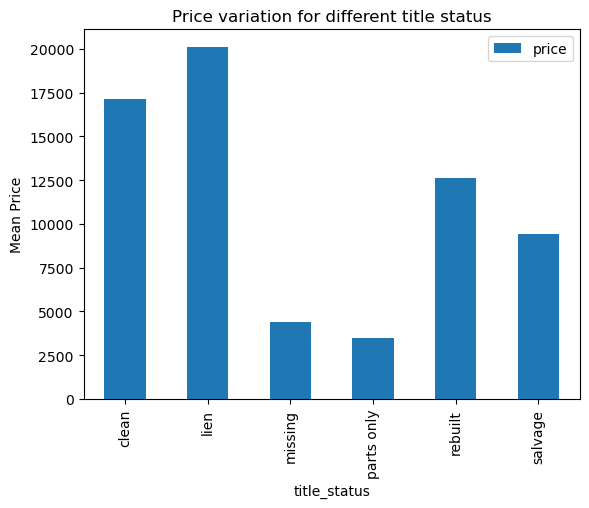

In [90]:
# Visualizing the price variation by the title status
df = data.groupby(['title_status'])['price'].mean().reset_index()
df.plot.bar(x = 'title_status', y = 'price')
plt.ylabel("Mean Price")
plt.title("Price variation for different title status")
plt.show()

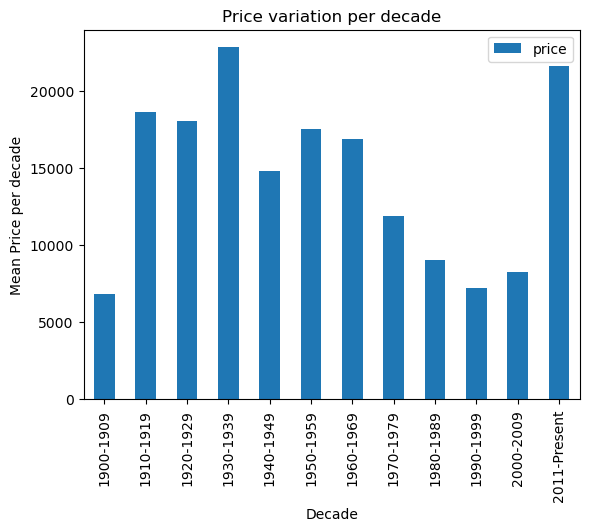

In [91]:
df = data[['year', 'price']].copy()
df['buckets'] = pd.cut(df['year'], bins=[1899, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2022],
                       labels=['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979',
                              '1980-1989', '1990-1999', '2000-2009', '2011-Present'])
df = df.groupby(['buckets'])['price'].mean().reset_index()
df.plot.bar(x = 'buckets', y = 'price')
plt.ylabel("Mean Price per decade")
plt.xlabel("Decade")
plt.title("Price variation per decade")
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Model 1 - Lasso Regression**

In [92]:
# Lets first build the train and test data
vehicle_X_train, vehicle_X_test, vehicle_y_train, vehicle_y_test = \
train_test_split(data_encoded.drop('price', axis=1), data_encoded['price'], test_size=0.3, random_state=42)

In [93]:
# First regression model - Lasso regression
veh_lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])
veh_lasso_pipe.fit(vehicle_X_train, vehicle_y_train)
lasso_coefs = veh_lasso_pipe.named_steps['lasso'].coef_

feature_names = veh_lasso_pipe.named_steps['poly_features'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})

set_config(display="diagram")
print(veh_lasso_pipe)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])


/opt/anaconda3/envs/pandas/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+12, tolerance: 2.708e+09
  model = cd_fast.enet_coordinate_descent(


In [94]:
# print the coef of the regression
lasso_df.loc[lasso_df['coef'] != 0]

,feature,coef
0,year,-28324.952419
1,odometer,-7204.802217
2,condition_excellent,-3438.937627
3,condition_fair,-6995.163435
4,condition_good,973.980430
...,...,...
613,condition_salvage title_status_missing^2,0.025768
617,condition_salvage title_status_parts only^2,0.004166
620,condition_salvage title_status_rebuilt^2,0.000002
659,title_status_missing^3,989.227219


In [95]:
#mean squared errors for lasso regression
lasso_train_mse = mean_squared_error(vehicle_y_train, veh_lasso_pipe.predict(vehicle_X_train))
lasso_test_mse = mean_squared_error(vehicle_y_test, veh_lasso_pipe.predict(vehicle_X_test))

print('Lasso Train MSE ', lasso_train_mse)
print('Lasso Test MSE ', lasso_test_mse)

Lasso Train MSE  101931570.5204947
Lasso Test MSE  110950869.55307394


---

**Model 2 - Sequential Selector and Linear Regression**

In [96]:
#sequential selector and linear regression
veh_seq_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
    ('linreg', LinearRegression())
])
veh_seq_pipe.fit(vehicle_X_train, vehicle_y_train)
seq_lin_reg_coefs = veh_seq_pipe.named_steps['linreg'].coef_

seq_feature_names = veh_seq_pipe.named_steps['poly_features'].get_feature_names_out()
seq_sel_feature_names = seq_feature_names[veh_seq_pipe.named_steps['selector'].get_support()]

seq_df = pd.DataFrame({'feature': seq_sel_feature_names, 'coef': seq_lin_reg_coefs})

print(veh_seq_pipe)
print(seq_df.loc[seq_df['coef'] != 0])

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])
                                  feature          coef
0                                    year  4.479838e+06
1                          condition_fair -5.486414e+03
2                                  year^2 -2.273313e+03
3       condition_good title_status_clean -6.957508e+05
4                                  year^3  3.844659e-01
5  year condition_good title_status_clean  3.478546e+02


In [98]:
# mean squared error with sequential selector + linear regression
seq_train_mse = mean_squared_error(vehicle_y_train, veh_seq_pipe.predict(vehicle_X_train))
seq_test_mse = mean_squared_error(vehicle_y_test, veh_seq_pipe.predict(vehicle_X_test))

print('Seq train MSE ', seq_train_mse)
print('Seq test MSE ', seq_test_mse)

Seq train MSE  92691483.0359984
Seq test MSE  92665530.09204285


---

**Model 3 - Ridge regression**

In [99]:
# Ridge modeling. using different alpha in gridsearch to figure out the correct alpha
veh_ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Trying alpha from 0.001 to 1000
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(estimator=veh_ridge_pipeline, param_grid=param_dict)
grid.fit(vehicle_X_train, vehicle_y_train)
ridge_train_mse = mean_squared_error(vehicle_y_train, grid.predict(vehicle_X_train))
ridge_test_mse = mean_squared_error(vehicle_y_test, grid.predict(vehicle_X_test))

print('Ridge train MSE ', ridge_train_mse)
print('Ridge test MSE ', ridge_test_mse)
print('alpha ', grid.best_params_)

Ridge train MSE  91932141.5546087
Ridge test MSE  97600615.27267957
alpha  {'ridge__alpha': 0.1}


---

**Model 4 - Linear regression using Lasso selector**

In [100]:
# using lasso as model selector
veh_lasso_sel_pipe = Pipeline([
      ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
      ('scaler', StandardScaler()),
      ('selector', SelectFromModel(Lasso())),
      ('linreg', LinearRegression())
])

veh_lasso_sel_pipe.fit(vehicle_X_train, vehicle_y_train)
lasso_sel_coef = veh_lasso_sel_pipe.named_steps['linreg'].coef_
lasso_sel_features = veh_lasso_sel_pipe.named_steps['poly_features'].get_feature_names_out()
lasso_sel_features = lasso_sel_features[veh_lasso_sel_pipe.named_steps['selector'].get_support()]

lasso_sel_df = pd.DataFrame({'feature': lasso_sel_features, 'coef' : lasso_sel_coef})
print(veh_lasso_sel_pipe)
print(lasso_sel_df)

/opt/anaconda3/envs/pandas/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+12, tolerance: 2.708e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('selector', SelectFromModel(estimator=Lasso())),
                ('linreg', LinearRegression())])
                                         feature          coef
0                                           year -3.665189e+12
1                                       odometer  5.923072e+15
2                            condition_excellent -6.318738e+15
3                                 condition_fair  4.645981e+13
4                                 condition_good -1.140935e+16
..                                           ...           ...
171     condition_salvage^2 title_status_rebuilt -4.449375e+02
172     condition_salvage title_status_missing^2  7.848629e+14
173  condition_salvage title_status_parts only^2 -1.259104e+14
174                       title_status_missing^3 -2.178811e+15
175                       title_status_rebui

In [101]:
lasso_sel_train_mse = mean_squared_error(vehicle_y_train, veh_lasso_sel_pipe.predict(vehicle_X_train))
lasso_sel_test_mse = mean_squared_error(vehicle_y_test, veh_lasso_sel_pipe.predict(vehicle_X_test))

print('Lasso selector Lin reg  train MSE ', lasso_sel_train_mse)
print('Lasso selector Lin reg test MSE', lasso_sel_test_mse)

Lasso selector Lin reg  train MSE  87768552.61859614
Lasso selector Lin reg test MSE 96867721.19795753


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Learnings**

* The factors affecting the used car prices the most - Year, odometer, condition and title status
* Based on the findings, the lowest Mean Squared Error on test data is from Linear regression using sequential selector
* The dataset was large, so evaluation of all variables was not possible

**Adjustment**

* One adjustment would be to distill data per manufacturer to determine if the data modeling differs for different manufacturers
* Other factors like type of vehicle and color which had high correlation index could be used for analysis

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Executive Summary**

Our comprehensive analysis of used car data has revealed crucial factors that influence car prices. These insights can assist dealers in fine-tuning their inventory, pricing strategies and sales approach to maximize profitability. Below are few findings that highlight key variables that affect car prices with actionable strategies for dealerships

**Critical variables affecting price**

* **Age of Car** Age of the car has a high negative coefficient. That is older cars depreciate in value significantly compared to newer cars. Focus should be on acquiring cars that are relatively new (2-4 years). Really old cars have higher value since they may fall into the vintage category
* **Mileage** Another factor that affects the car prices significantly is the odometer reading. Cars with lower mileage command higher prices. A threshold of around 100000 is significant with car prices dropping down beyond this mileage
* **Condition** Cars rated as 'Excellent', 'Good', 'New' and 'Like New' are priced significantly higher than those rated 'Fair' and 'Salvage'. Minor repairs or detailing can improve the car condition and increase prices by around 2x
* **Title Status** Car titles that were 'Clean' or 'Lien' commanded good prices. The prices on other title statuses is significantly lower. Getting a used car with clean title will result in more than 3x the prices of cars with missing or incomplete title.

**Strategic Recommendations**

* Prioritize acquiring cars that newer with low mileage and in excellent condition
* Use dynamic pricing based on key variables identified and the data modeling algorithm
* Hightlight features that customers value - low mileage, excellent condition and popular colors

**Conclusion**
We recommend implementing data driven pricing tools and continuing to anlyze market trends to remain competitive in the market.